Part 1: Set-up

1.

In [1]:
from numpy.random import seed
import tensorflow as tf
seed(1234)
tf.random.set_seed(1234)

2.

In [2]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/IMT575_HW3_train.tsv', sep="\t", header=None)
test = pd.read_csv('/content/drive/MyDrive/IMT575_HW3_test.tsv', sep="\t",header=None)
train.columns=["score","text"]
test.columns=["score","text"]
#train.head()
#test.head()
print("Train data size:", train.shape)
print("Test data size:",test.shape)



Train data size: (1515, 2)
Test data size: (268, 2)


3.

Distribution of training labels:
8.0     581
9.0     282
10.0    276
7.0     113
6.0      94
11.0     90
12.0     38
5.0      16
4.0      14
2.0      10
3.0       1
Name: score, dtype: int64
Distribution of test labels:
8.0     106
9.0      52
10.0     40
7.0      22
11.0     19
6.0      16
12.0      9
4.0       3
5.0       1
Name: score, dtype: int64


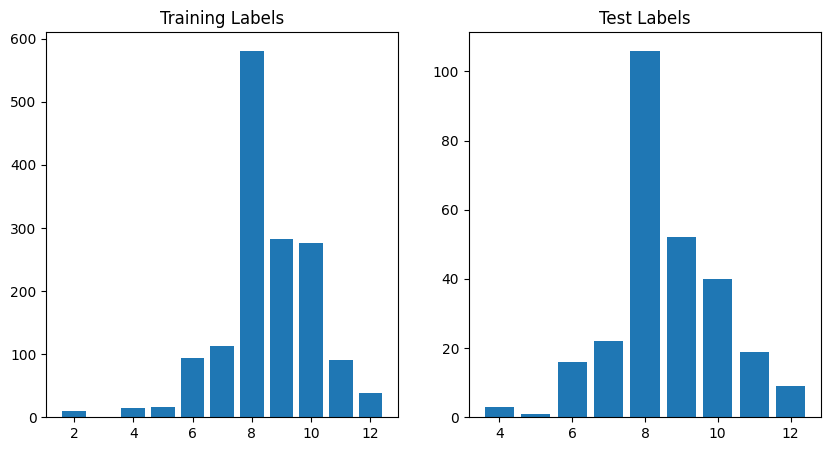

The distribution of labels is almost the same between the training and test datasets.
This will help us ensure that the model can generalize well to new data. 
Significant difference between the distribution of the two datasets can lead to poor performance on the test set.


In [3]:
import matplotlib.pyplot as plt

print("Distribution of training labels:")
print(train['score'].value_counts())

print("Distribution of test labels:")
print(test['score'].value_counts())


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(train['score'].value_counts().index, train['score'].value_counts().values)
axs[0].set_title('Training Labels')
axs[1].bar(test['score'].value_counts().index, test['score'].value_counts().values)
axs[1].set_title('Test Labels')
plt.show()


print("The distribution of labels is almost the same between the training and test datasets.\nThis will help us ensure that the model can generalize well to new data. \nSignificant difference between the distribution of the two datasets can lead to poor performance on the test set.")

4.


In [4]:
import string
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
#to lowercase
train['text']=train['text'].str.lower()
#train.head()

#remove punctuation
def remove_punctuation(text):
    #replace punctuation with whitespace
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    #remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()
    return text

train['text'] = train['text'].apply(remove_punctuation)
#train.head()

# Remove stopwords and domain-specific stop words
stop_words = set(stopwords.words('english'))
domain_stop_words = ["caps1", "caps2", "caps1s"]
stop_words.update(domain_stop_words)


def stopwords_remove(text):
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

train['text'] = train['text'].apply(stopwords_remove)

print("\nI removed the caps1 and caps2 words as they didn't provide much value in determining how well the essay was written\n")
train.head(5)


I removed the caps1 and caps2 words as they didn't provide much value in determining how well the essay was written



,score,text
0,8.0,dear people world use coumputers know computer...
1,10.0,dear newspaper believe advances technology man...
2,6.0,think use computers help selfs using computer ...
3,9.0,want child suceed life computers valuable ever...
4,8.0,dear local newspaper computers important peopl...


5.

In [6]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

# lemmatize the 'text' column in the train dataframe
train['text2'] = train['text'].apply(lemmatize_text)

# print the first few observations before and after lemmatization
for i in range(5):
    print(f"Before: {train['text'][i]}")
    print(f"After: {train['text2'][i]}")

print("\nIn the first column we see that the WordNetLemmatizer lemmatizes 'computers' to 'computer' and 'games' to 'game'.\nWhen the spelling of computer is wrong, the lemmatizer is unable to identify it as a word that could be lemmatized.\nIt also lemmatizes 'uses' to 'us' in the 5th column")


Before: dear people world use coumputers know computers used like surching internet games work school people think computers good use help teach hand eye coordination learn places world talk people online num1 grade mystic middle school think computers good people think ever heard computer camps kids go addicted computer camp kids pulled away computer pritty much forced join gropes activitys like fishing working together solve mystery camp pritty much known reliable kids addicted computer another reason computers bad internet internet dangerous place chat people dont even know never know people could messed head try find caps4 like come always carful talk wise could get nothing eve really goes right computers alway getting slower slower every time use every two years kid parent could go throw computer also computer doesnt right caps3 could get vins cost person hundred dollars get fixed thing could happen time computer caps4 could die work data gone forever explaines part computers peop

6.

In [8]:
#tokenization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', min_df=5, max_df=0.5)
train_tokens = vectorizer.fit_transform(train['text2'])
print("Number of unique tokens:", len(vectorizer.get_feature_names_out()))
print("Setting min_df=5 means that tokens that occur in fewer than 5 documents will be excluded, and setting max_df=0.5 means that tokens that occur in more than 50% of the documents will be excluded")


Number of unique tokens: 2723
Setting min_df=5 means that tokens that occur in fewer than 5 documents will be excluded, and setting max_df=0.5 means that tokens that occur in more than 50% of the documents will be excluded


7.

In [9]:
#pre-process test data
test['text']=test['text'].str.lower()
test['text'] = test['text'].apply(remove_punctuation)
test['text'] = test['text'].apply(stopwords_remove)
test['text2'] = test['text'].apply(lemmatize_text)

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', min_df=5, max_df=0.5)

# fit the vectorizer on the training data and transform the data
train_tokens = vectorizer.fit_transform(train['text2'])
print("Number of unique tokens in training data:", len(vectorizer.get_feature_names_out()))

# transform the test data
test_tokens = vectorizer.transform(test['text2'])
print("Number of unique tokens in test data:", len(vectorizer.get_feature_names_out()))


Number of unique tokens in training data: 2723
Number of unique tokens in test data: 2723


Part 2: Supervised Learning

7.

In [10]:
from textblob import TextBlob
# create sentiment feature
train['sentiment'] = train['text2'].apply(lambda x: TextBlob(x).sentiment.polarity)
test['sentiment'] = test['text2'].apply(lambda x: TextBlob(x).sentiment.polarity)
train.head()
test.head()

,score,text,text2,sentiment
0,11.0,dear editor ever would know something badly ca...,dear editor ever would know something badly ca...,0.189949
1,9.0,computers everyone dont think heres gonna conv...,computer everyone dont think here gonna convin...,0.345833
2,11.0,say computers bad todays society im prove wron...,say computer bad today society im prove wrong ...,0.209170
3,10.0,dear editor ever stopped asked important cours...,dear editor ever stopped asked important cours...,0.193869
4,12.0,study conducted organization1 num1 num2 people...,study conducted organization1 num1 num2 people...,0.148685


8.

MSE: 0.9670


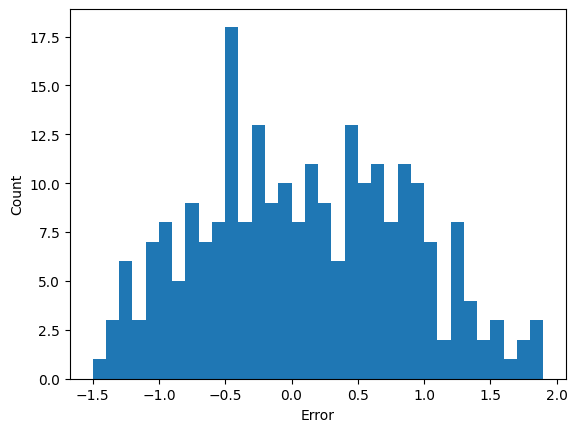

I used GridSearchCV to find the optimal value of alpha. 
I am evaluating the performance using mean squared error (MSE).
The regularization coefficient alpha was chosen from the values [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]. 
The model performs reasonably well with a MSE of 0.9670, and the histogram shows a roughly normal distribution of errors around 0.


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train['text2'])
test_features = vectorizer.transform(test['text2'])

param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
model = GridSearchCV(Ridge(), param_grid, cv=10, scoring='neg_mean_squared_error')
model.fit(train_features, train['score'])

test_predictions = model.predict(test_features)

mse = mean_squared_error(test['score'], test_predictions)
print(f"MSE: {mse:.4f}")

error = test_predictions - test['score']
plt.hist(error, bins=np.arange(-1.5, 2.0, 0.1))
plt.xlabel('Error')
plt.ylabel('Count')
plt.show()

print("I used GridSearchCV to find the optimal value of alpha. \nI am evaluating the performance using mean squared error (MSE).\nThe regularization coefficient alpha was chosen from the values [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]. \nThe model performs reasonably well with a MSE of 0.9670, and the histogram shows a roughly normal distribution of errors around 0.")


MSE: 0.9651


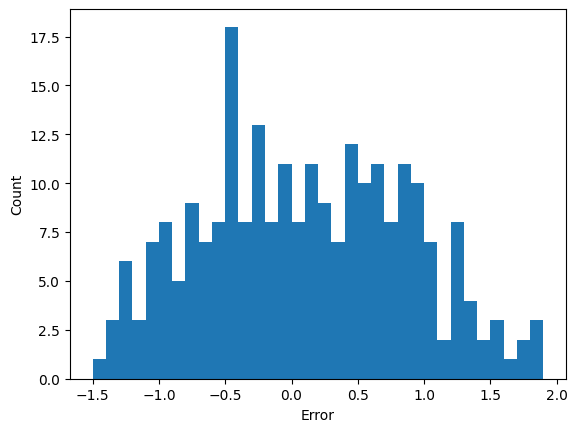

By adding the sentiment feature to the model, the mean squared error (MSE) decreased from 0.9670 to 0.9651, 
indicating that the sentiment feature has a small but noticeable impact on improving the model's predictive performance


In [12]:
#adding the sentiment feature 
from scipy.sparse import hstack

# Tokenize the sentiment values
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
train_sentiment = vectorizer.fit_transform(train['sentiment'].astype(str))
test_sentiment = vectorizer.transform(test['sentiment'].astype(str))

train_features = hstack((train_features, train_sentiment))
test_features = hstack((test_features, test_sentiment))

param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
model = GridSearchCV(Ridge(), param_grid, cv=10, scoring='neg_mean_squared_error')
model.fit(train_features, train['score'])

test_predictions = model.predict(test_features)
mse = mean_squared_error(test['score'], test_predictions)
print(f"MSE: {mse:.4f}")

error = test_predictions - test['score']
plt.hist(error, bins=np.arange(-1.5, 2.0, 0.1))
plt.xlabel('Error')
plt.ylabel('Count')
plt.show()
print("By adding the sentiment feature to the model, the mean squared error (MSE) decreased from 0.9670 to 0.9651, \nindicating that the sentiment feature has a small but noticeable impact on improving the model's predictive performance")

9.

MSE: 0.7845


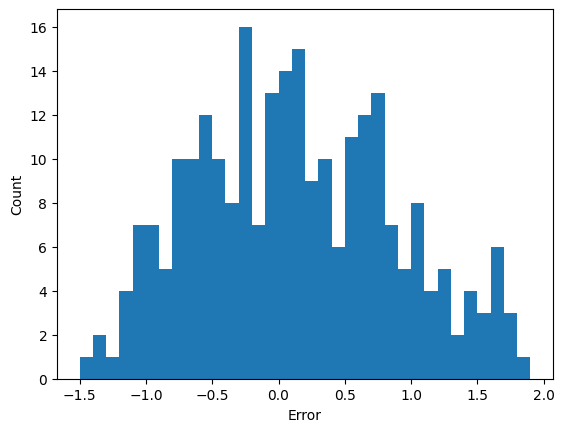

After using the SVR model with grid search to find the best hyperparameters, the mean squared error (MSE) improved from 0.9670 to 0.7845. 
This indicates that the SVR model performs better than the Ridge regression model for this particular task.


In [13]:
#using SVR
from sklearn.svm import SVR

vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train['text2'])
test_features = vectorizer.transform(test['text2'])

svr = SVR(kernel='rbf')
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale']}
model = GridSearchCV(svr, param_grid, cv=10, scoring='neg_mean_squared_error')
model.fit(train_features, train['score'])

test_predictions = model.predict(test_features)

mse = mean_squared_error(test['score'], test_predictions)
print(f"MSE: {mse:.4f}")

error = test_predictions - test['score']
plt.hist(error, bins=np.arange(-1.5, 2.0, 0.1))
plt.xlabel('Error')
plt.ylabel('Count')
plt.show()
print("After using the SVR model with grid search to find the best hyperparameters, the mean squared error (MSE) improved from 0.9670 to 0.7845. \nThis indicates that the SVR model performs better than the Ridge regression model for this particular task.")

MSE: 0.7838


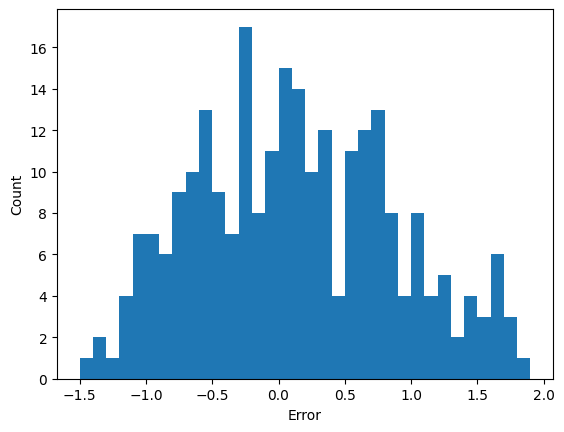

By adding the sentiment feature to the SVR model, the mean squared error (MSE) decreased from 0.7845 to 0.7838,
 therefore improving the model's predictive performance slightly.


In [14]:
#adding the sentiment feature 
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
train_sentiment = vectorizer.fit_transform(train['sentiment'].astype(str))
test_sentiment = vectorizer.transform(test['sentiment'].astype(str))

vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train['text2'])
test_features = vectorizer.transform(test['text2'])

train_features = hstack((train_features, train_sentiment))
test_features = hstack((test_features, test_sentiment))

svr = SVR(kernel='rbf')
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale']}
model = GridSearchCV(svr, param_grid, cv=10, scoring='neg_mean_squared_error')
model.fit(train_features, train['score'])

test_predictions = model.predict(test_features)

mse = mean_squared_error(test['score'], test_predictions)
print(f"MSE: {mse:.4f}")

error = test_predictions - test['score']
plt.hist(error, bins=np.arange(-1.5, 2.0, 0.1))
plt.xlabel('Error')
plt.ylabel('Count')
plt.show()

print("By adding the sentiment feature to the SVR model, the mean squared error (MSE) decreased from 0.7845 to 0.7838,\n therefore improving the model's predictive performance slightly.")


10.


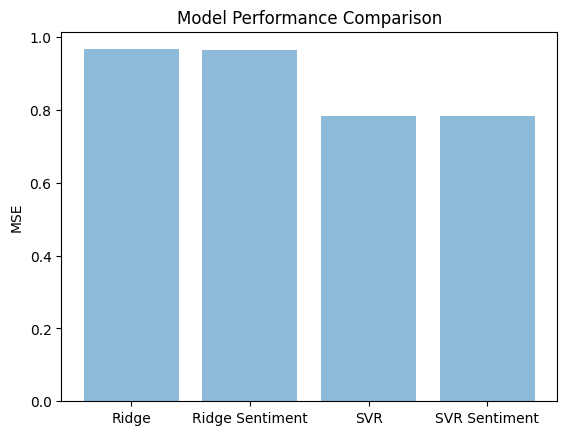

SVR with sentiment performs the best, whereas ridge without sentiment performs the worst


In [17]:
mse_ridge_sentiment = 0.9651
mse_ridge = 0.9670
mse_svr_sentiment = 0.7838
mse_svr = 0.7845

# Create a bar plot
x = np.arange(4)
models = [ 'Ridge','Ridge Sentiment', 'SVR','SVR Sentiment']
mse_values = [ mse_ridge, mse_ridge_sentiment, mse_svr, mse_svr_sentiment ]
plt.bar(x, mse_values, align='center', alpha=0.5)
plt.xticks(x, models)
plt.ylabel('MSE')
plt.title('Model Performance Comparison')

# Display the plot
plt.show()
print("SVR with sentiment performs the best, whereas ridge without sentiment performs the worst")

Part 3: Deep Sentence Embedder

13.

MSE: 0.7845


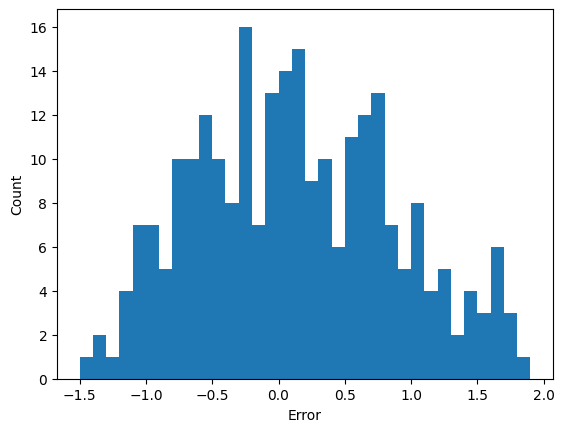

I have chosen the Support Vector Regression regressor without sentiment feature
 because adding sentiment only improved the performance slightly.


In [19]:
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train['text2'])
test_features = vectorizer.transform(test['text2'])

svr = SVR(kernel='rbf')
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale']}
model1 = GridSearchCV(svr, param_grid, cv=10, scoring='neg_mean_squared_error')
model1.fit(train_features, train['score'])

test_predictions = model1.predict(test_features)

mse = mean_squared_error(test['score'], test_predictions)
print(f"MSE: {mse:.4f}")

error = test_predictions - test['score']
plt.hist(error, bins=np.arange(-1.5, 2.0, 0.1))
plt.xlabel('Error')
plt.ylabel('Count')
plt.show()


print("I have chosen the Support Vector Regression regressor without sentiment feature\n because adding sentiment only improved the performance slightly.")


14.

In [20]:
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)


15.

In [21]:
# Embedding the training data
train_embeddings = model(train['text2'])


16.

In [23]:
# Embedding the training and test data
train_embeddings = np.array(model(train['text2']))
test_embeddings = np.array(model(test['text2']))

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale']}

svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(train_embeddings, train['score'])
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
test_predictions = grid_search.predict(test_embeddings)

mse = mean_squared_error(test['score'], test_predictions)
print(f"MSE: {mse:.4f}")
print("Surprisingly, model with deep embeddings as a feature does not perform as good as the SVR model.\nThough it does perform better than the ridge model we used in part 2.")

Best hyperparameters: {'C': 10, 'gamma': 0.1}
MSE: 0.8540
Surprisingly, model with deep embeddings as a feature does not perform as good as the SVR model.
Though it does perform better than the ridge model we used in part 2.
